In [1]:
import desc.monitor
import os
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
forcedPhotometryFolder = '/Users/Bryce/Desktop/output_data/forced'
lc = desc.monitor.LightCurve(fp_table_dir=forcedPhotometryFolder, 
                        bandpasses=['r'], visitLists=[np.arange(840, 849)], 
                        mjdFile = os.path.join('../data/','selectedVisits.csv'))

In [3]:
lc.build_lightcurve(11)

/Users/Bryce/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


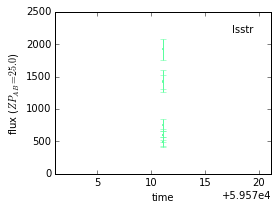

In [4]:
fig = lc.visualize_lightcurve()